<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [147]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Step 1: Load the dataset


In [148]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.

In [149]:
## Write your code here

# Transform the values in Age into numerical
# Define a function to convert age categories to numerical values
def convert_age_to_numeric(age):
    if age == 'Under 18 years old':
        return 17
    elif age == '18-24 years old':
        return (18 + 24) / 2
    elif age == '25-34 years old':
        return (25 + 34) / 2
    elif age == '35-44 years old':
        return (35 + 44) / 2
    elif age == '45-54 years old':
        return (45 + 54) / 2
    elif age == '55-64 years old':
        return (55 + 64) / 2
    elif age == '65 years or older':
        return 70
    elif age == "Prefer not to say":
        return 29.5
    else:
        return None

# Apply the function to the Age column to create Age_numeric
df['Age_numerical'] = df['Age'].apply(convert_age_to_numeric)
print(df['Age_numerical'].dtypes)

float64


In [150]:
Age_Sat6 = df.loc[:, ['Age_numerical', 'JobSatPoints_6']]

In [151]:
Age_Sat6.describe(include='all')

Age_numerical  JobSatPoints_6
count   65437.000000    29450.000000
mean       33.029853       24.343232
std        11.182094       27.089360
min        17.000000        0.000000
25%        21.000000        0.000000
50%        29.500000       20.000000
75%        39.500000       30.000000
max        70.000000      100.000000

In [152]:
# your code goes here
Age_Sat6.isnull().sum()

Age_numerical         0
JobSatPoints_6    35987
dtype: int64

In [153]:
Age_Sat6['JobSatPoints_6'].dtypes

dtype('float64')

In [154]:
!pip install scikit-learn

In [155]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
Age_Sat6['JobSatPoints_6'] = pt.fit_transform(Age_Sat6[['JobSatPoints_6']])

In [156]:
median_sat6 = Age_Sat6['JobSatPoints_6'].median()
Age_Sat6.loc[Age_Sat6['JobSatPoints_6'].isna(), 'JobSatPoints_6'] = median_sat6

In [157]:
Age_Sat6.head()

Age_numerical  JobSatPoints_6
0           17.0        0.297209
1           39.5       -1.401330
2           49.5        0.297209
3           21.0        0.297209
4           21.0        0.297209

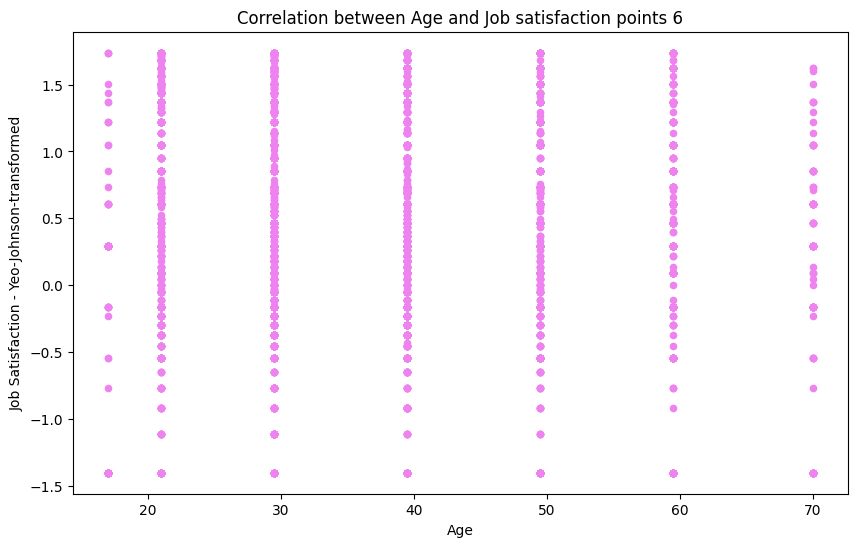

In [158]:
Age_Sat6.plot(kind='scatter', x='Age_numerical', y='JobSatPoints_6', figsize=(10, 6), color='violet')

plt.title('Correlation between Age and Job satisfaction points 6')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction - Yeo-Johnson-transformed')

plt.show()

**Comments:**
- There are no clear trends in terms of the age and the job satisfaction, at 20 and 30 there are more data points at the top with higher job satisfaction levels.
- However, it is likely there is a week negative correlation as the dot densities become thin as the age becomes larger , among 20 to 60, for 70 and below 18, we do not have enough data.

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


In [159]:
## Write your code here
# Standard deviation 
std_convertedcompyearly = df['ConvertedCompYearly'].std()
# Define the upper and lower bounds
lower_bound = -3*std_convertedcompyearly
upper_bound = 3*std_convertedcompyearly

# Cap the outliers
df['ConvertedCompYearly'] = df['ConvertedCompYearly'].clip(lower=lower_bound, upper=upper_bound)



In [160]:
median_converted_comp_yearly = df['ConvertedCompYearly'].median()

# Fill NaN values in 'ConvertedYearlyComp' with the calculated mean
df.loc[df['ConvertedCompYearly'].isna(), 'ConvertedCompYearly'] = median_converted_comp_yearly

In [161]:
Comp_sat6 = df.loc[:, ['JobSatPoints_6', 'ConvertedCompYearly']]

In [162]:
pt = PowerTransformer(method='yeo-johnson')
Comp_sat6['JobSatPoints_6'] = pt.fit_transform(Comp_sat6[['JobSatPoints_6']])

In [163]:
Comp_sat6.describe()

JobSatPoints_6  ConvertedCompYearly
count    2.945000e+04         65437.000000
mean     1.843310e-16         71113.162587
std      1.000017e+00         45744.582205
min     -1.401330e+00             1.000000
25%     -1.401330e+00         65000.000000
50%      2.972090e-01         65000.000000
75%      6.092496e-01         65000.000000
max      1.738345e+00        560270.919259

In [164]:
Comp_sat6.isnull().sum()

JobSatPoints_6         35987
ConvertedCompYearly        0
dtype: int64

In [165]:
median_sat6 = Comp_sat6['JobSatPoints_6'].median()
Comp_sat6.loc[Comp_sat6['JobSatPoints_6'].isna(), 'JobSatPoints_6'] = median_sat6

In [166]:
Comp_sat6.isnull().sum()

JobSatPoints_6         0
ConvertedCompYearly    0
dtype: int64

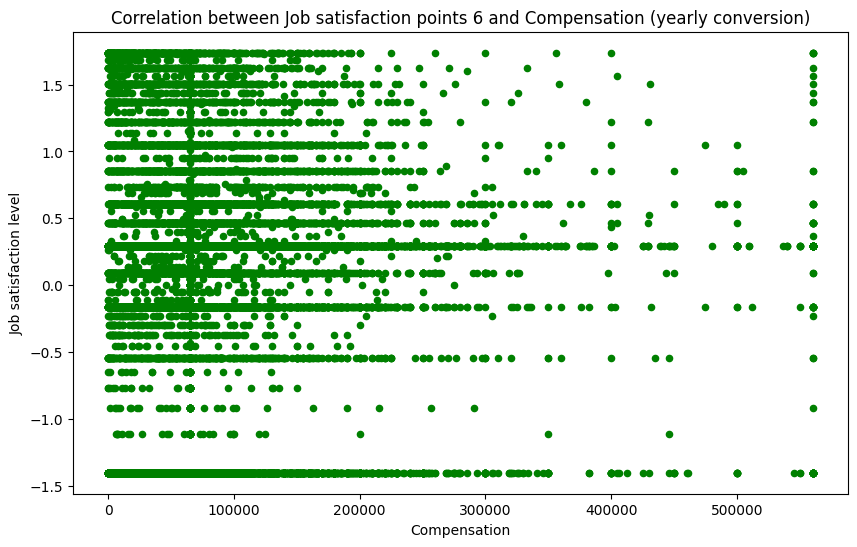

In [167]:
Comp_sat6.plot(kind='scatter', x='ConvertedCompYearly', y='JobSatPoints_6', figsize=(10, 6), color='green')

plt.title('Correlation between Job satisfaction points 6 and Compensation (yearly conversion)')
plt.xlabel('Compensation')
plt.ylabel('Job satisfaction level')

plt.show()

**Comments:**
- There are no clear conversion from the yearly compensation into the job satisfaction, even the opposite trend can be seen that at a compensation of less than 100000, there was a denser group of respodnets experience the highest job sattisfaction (the top left).

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



In [168]:
!pip install numpy
import numpy as np

Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


In [169]:
## Write your code here
Age_Sat6.head()

Age_numerical  JobSatPoints_6
0           17.0        0.297209
1           39.5       -1.401330
2           49.5        0.297209
3           21.0        0.297209
4           21.0        0.297209

In [170]:
x = Age_Sat6['Age_numerical']      # year on x-axis
y = Age_Sat6['JobSatPoints_6']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

array([-0.00091784,  0.19376601])

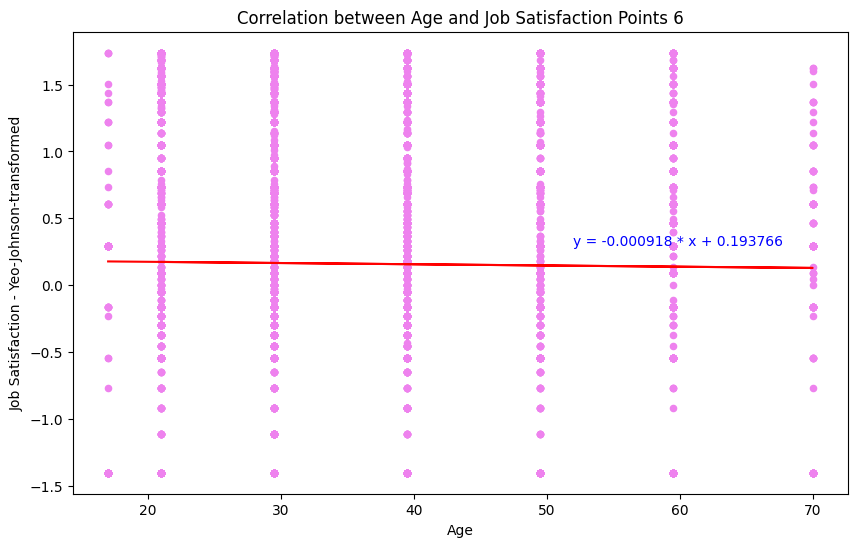

Job Satisfaction = -0.000918 * Age + 0.193766


In [171]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Assuming Age_Sat6 is your DataFrame with the necessary data
# Define the fit coefficients
fit = np.array([-0.00091784,  0.19376601])

# Plot the scatter plot
Age_Sat6.plot(kind='scatter', x='Age_numerical', y='JobSatPoints_6', figsize=(10, 6), color='violet')

plt.title('Correlation between Age and Job Satisfaction Points 6')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction - Yeo-Johnson-transformed')

# Plot line of best fit
x = Age_Sat6['Age_numerical']  # Ensure x is defined
plt.plot(x, fit[0] * x + fit[1], color='red')  # Recall that x is the Years

plt.annotate('y = -0.000918 * x + 0.193766', (52, 0.3), fontsize=10, color='blue')

# Show the plot
plt.show()

# Print out the line of best fit
print('Job Satisfaction = {0:.6f} * Age + {1:.6f}'.format(fit[0], fit[1]))

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


In [172]:
## Write your code here
Exp_Age = df.loc[:, ['Age_numerical', 'YearsCodePro']]
print(Exp_Age.describe())
print(Exp_Age.isnull().sum())

       Age_numerical
count   65437.000000
mean       33.029853
std        11.182094
min        17.000000
25%        21.000000
50%        29.500000
75%        39.500000
max        70.000000
Age_numerical        0
YearsCodePro     13827
dtype: int64


In [173]:
# Define a mapping for YearsCodePro
years_code_pro_mapping = {
    'Less than 1 year': 0,  # Assuming less than 1 year is represented as 0
    'More than 50 years': 51,  # Assuming more than 50 years is represented as 51
    # Add other mappings for string values
}
# Replacing the above categorical values
Exp_Age['YearsCodePro'] = Exp_Age['YearsCodePro'].replace(years_code_pro_mapping)

# Convert the remaining numeric strings to integers
Exp_Age['YearsCodePro'] = pd.to_numeric(Exp_Age['YearsCodePro'], errors='coerce')

# Fill NaN values in the 'YearsCodePro' column with 2
Exp_Age.loc[Exp_Age['YearsCodePro'].isna(), 'YearsCodePro'] = 2

In [175]:
print(Exp_Age.describe())
print(Exp_Age.isnull().sum())
print(Exp_Age.shape)

       Age_numerical  YearsCodePro
count   65437.000000  65437.000000
mean       33.029853      8.454972
std        11.182094      8.752962
min        17.000000      0.000000
25%        21.000000      2.000000
50%        29.500000      5.000000
75%        39.500000     12.000000
max        70.000000     51.000000
Age_numerical    0
YearsCodePro     0
dtype: int64
(65437, 2)


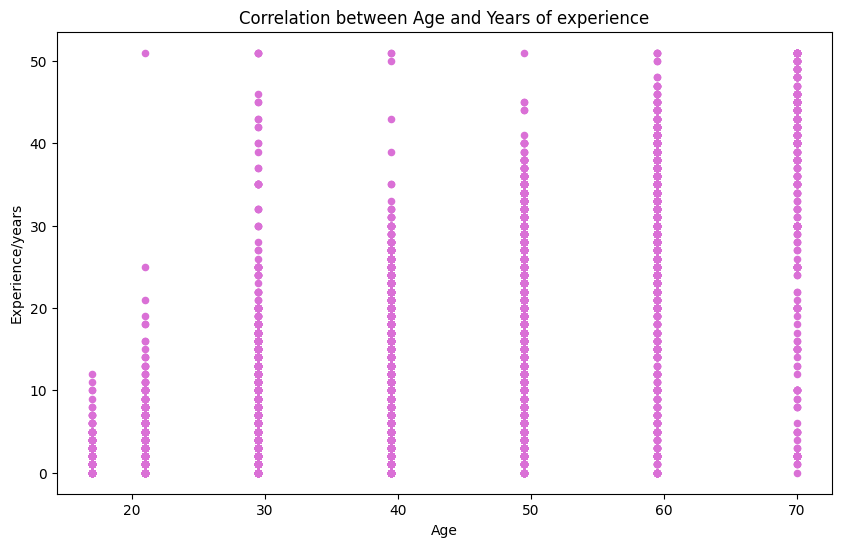

In [176]:
Exp_Age.plot(kind='scatter', x='Age_numerical', y='YearsCodePro', figsize=(10, 6), color='orchid')

plt.title('Correlation between Age and Years of experience')
plt.xlabel('Age')
plt.ylabel('Experience/years')

plt.show()

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


In [177]:
# Count occurrences of each age category
age_counts = df['Age'].value_counts()

# Convert the Series to a DataFrame
Age_frequency = age_counts.reset_index()
Age_frequency.columns = ['Age', 'Count']  # Rename columns for clarity

# Merge Age_frequency with the original DataFrame
satisfaction = df.merge(Age_frequency, on='Age', how='left')

# Display the result
print(satisfaction.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [178]:
## Write your code here
# Create a dataframe called satisfaction
satisfaction = satisfaction.loc[:, ['Age', 'Age_numerical', 'ConvertedCompYearly','JobSatPoints_6','Count']]
print(satisfaction.head(),'\n')
print(satisfaction.describe())

                  Age  Age_numerical  ConvertedCompYearly  JobSatPoints_6  \
0  Under 18 years old           17.0              65000.0             NaN   
1     35-44 years old           39.5              65000.0             0.0   
2     45-54 years old           49.5              65000.0             NaN   
3     18-24 years old           21.0              65000.0             NaN   
4     18-24 years old           21.0              65000.0             NaN   

   Count  
0   2568  
1  14942  
2   6249  
3  14098  
4  14098   

       Age_numerical  ConvertedCompYearly  JobSatPoints_6         Count
count   65437.000000         65437.000000    29450.000000  65437.000000
mean       33.029853         71113.162587       24.343232  15995.962636
std        11.182094         45744.582205       27.089360   7148.570068
min        17.000000             1.000000        0.000000    322.000000
25%        21.000000         65000.000000        0.000000  14098.000000
50%        29.500000         65000.00

In [179]:
print(satisfaction.isnull().sum())

Age                        0
Age_numerical              0
ConvertedCompYearly        0
JobSatPoints_6         35987
Count                      0
dtype: int64


In [180]:
pt = PowerTransformer(method='yeo-johnson')
satisfaction['JobSatPoints_6'] = pt.fit_transform(satisfaction[['JobSatPoints_6']])
median_sat6 = satisfaction['JobSatPoints_6'].median()
satisfaction.loc[satisfaction['JobSatPoints_6'].isna(), 'JobSatPoints_6'] = median_sat6

In [181]:
print(satisfaction.isnull().sum(),'\n')
print(satisfaction.describe())

Age                    0
Age_numerical          0
ConvertedCompYearly    0
JobSatPoints_6         0
Count                  0
dtype: int64 

       Age_numerical  ConvertedCompYearly  JobSatPoints_6         Count
count   65437.000000         65437.000000    65437.000000  65437.000000
mean       33.029853         71113.162587        0.163450  15995.962636
std        11.182094         45744.582205        0.686965   7148.570068
min        17.000000             1.000000       -1.401330    322.000000
25%        21.000000         65000.000000        0.297209  14098.000000
50%        29.500000         65000.000000        0.297209  14942.000000
75%        39.500000         65000.000000        0.297209  23911.000000
max        70.000000        560270.919259        1.738345  23911.000000


In [182]:
# Calculate the logarithm and assign it using .loc
satisfaction.loc[:, 'Log_CompTotal'] = np.log(satisfaction['ConvertedCompYearly'] + 1)  # Adding 1 to avoid log(0)

# Display the updated DataFrame
print(satisfaction.head())

                  Age  Age_numerical  ConvertedCompYearly  JobSatPoints_6  \
0  Under 18 years old           17.0              65000.0        0.297209   
1     35-44 years old           39.5              65000.0       -1.401330   
2     45-54 years old           49.5              65000.0        0.297209   
3     18-24 years old           21.0              65000.0        0.297209   
4     18-24 years old           21.0              65000.0        0.297209   

   Count  Log_CompTotal  
0   2568      11.082158  
1  14942      11.082158  
2   6249      11.082158  
3  14098      11.082158  
4  14098      11.082158  


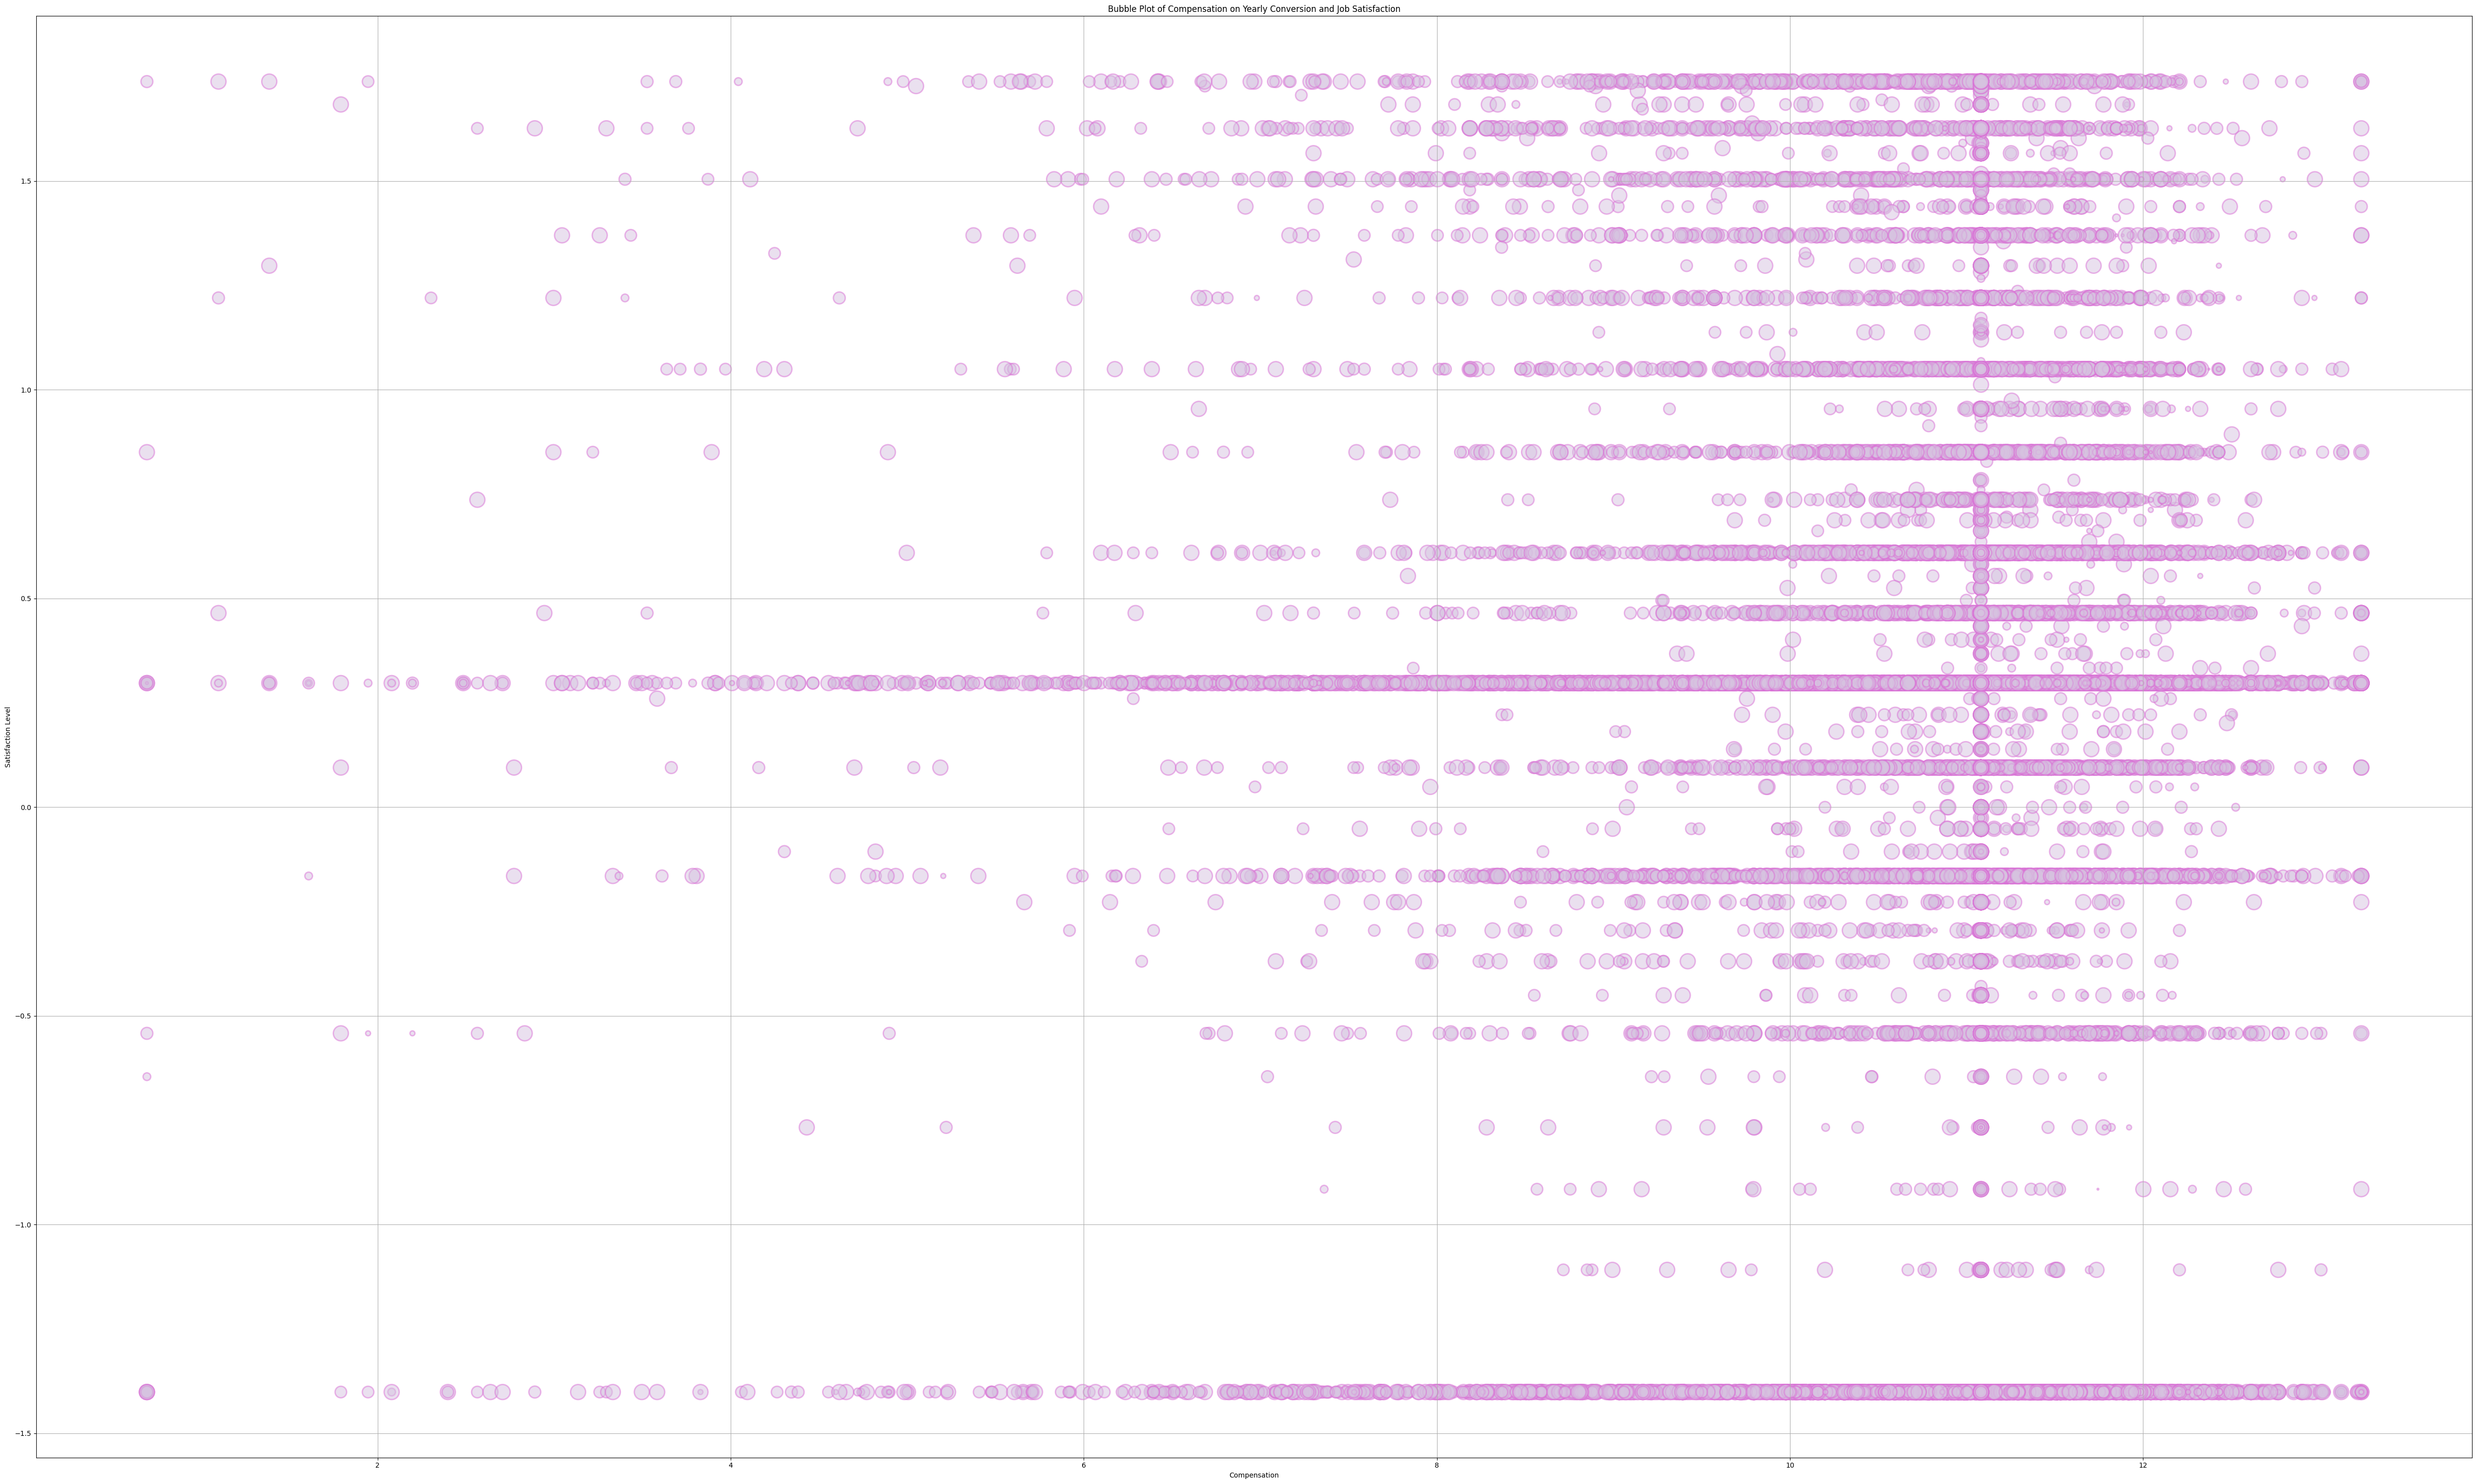

In [183]:
# Create a bubble plot with custom colors
plt.figure(figsize=(50, 30))
plt.scatter(satisfaction['Log_CompTotal'], satisfaction['JobSatPoints_6'], 
            s=satisfaction['Count'] /50,  # Adjusted divisor for smaller dots
            alpha=0.5, 
            edgecolors='orchid',
            linewidth=2, 
            c='#D6C3E0')  # Fill color resembling Blue Moon rose

# Adding labels and title
plt.title('Bubble Plot of Compensation on Yearly Conversion and Job Satisfaction')
plt.xlabel('Compensation')
plt.ylabel('Satisfaction Level')
plt.grid(True)
plt.tight_layout()
# Show the plot
plt.show()

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


In [184]:
## Write your code here
Lang_Sat = df.loc[:, ['LanguageHaveWorkedWith', 'JobSat']]
print(Lang_Sat.head())

                              LanguageHaveWorkedWith  JobSat
0                                                NaN     NaN
1  Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...     NaN
2                                                 C#     NaN
3  C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...     NaN
4            C++;HTML/CSS;JavaScript;Lua;Python;Rust     NaN


In [185]:
Lang_Sat.isnull().sum()

LanguageHaveWorkedWith     5692
JobSat                    36311
dtype: int64

In [186]:
Lang_Sat['JobSat'].describe()

count    29126.000000
mean         6.935041
std          2.088259
min          0.000000
25%          6.000000
50%          7.000000
75%          8.000000
max         10.000000
Name: JobSat, dtype: float64

In [187]:
median_jobsat = Lang_Sat['JobSat'].median()
Lang_Sat.loc[Lang_Sat['JobSat'].isna(), 'JobSat'] = median_jobsat

In [188]:
Lang_Sat['JobSat'].describe(include = 'all')

count    65437.000000
mean         6.971087
std          1.393560
min          0.000000
25%          7.000000
50%          7.000000
75%          7.000000
max         10.000000
Name: JobSat, dtype: float64

In [189]:
#drop nan
# Drop rows with missing values in LanguageHaveWorkedWith
Lang_Sat = Lang_Sat.dropna(subset=['LanguageHaveWorkedWith'])

In [190]:
Lang_Sat.isnull().sum()

LanguageHaveWorkedWith    0
JobSat                    0
dtype: int64

In [191]:
# Step 1: Explode the Language combinations into separate rows
Lang_Sat['LanguageHaveWorkedWith'] = Lang_Sat['LanguageHaveWorkedWith'].str.split(';')
Lang_Sat_exploded = Lang_Sat.explode('LanguageHaveWorkedWith')

# Step 2: Count language popularity
language_popularity = Lang_Sat_exploded['LanguageHaveWorkedWith'].value_counts().reset_index()
language_popularity.columns = ['Language', 'TotalCount']

# Display the results
print("Exploded DataFrame:")
print(Lang_Sat_exploded)
print("\nLanguage Popularity:")
print(language_popularity)

Exploded DataFrame:
        LanguageHaveWorkedWith  JobSat
1      Bash/Shell (all shells)     7.0
1                           Go     7.0
1                     HTML/CSS     7.0
1                         Java     7.0
1                   JavaScript     7.0
...                        ...     ...
65436                     Java     7.0
65436               JavaScript     7.0
65436                      PHP     7.0
65436                   Python     7.0
65436               TypeScript     7.0

[322233 rows x 2 columns]

Language Popularity:
                   Language  TotalCount
0                JavaScript       37492
1                  HTML/CSS       31816
2                    Python       30719
3                       SQL       30682
4                TypeScript       23150
5   Bash/Shell (all shells)       20412
6                      Java       18239
7                        C#       16318
8                       C++       13827
9                         C       12184
10                     

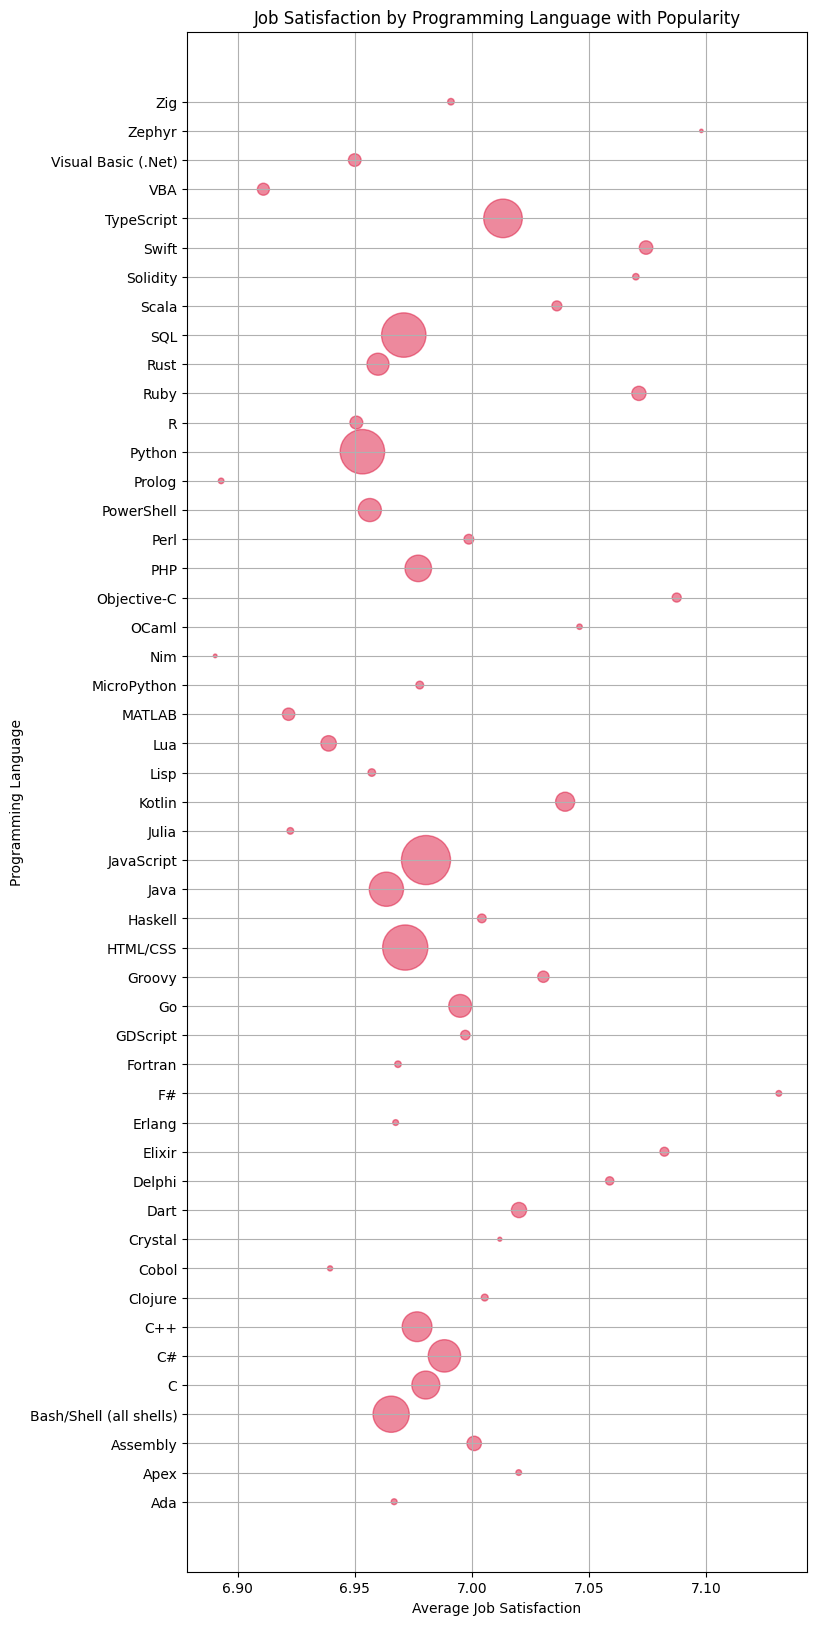

In [192]:
# Calculate average JobSat for each language
avg_job_sat = Lang_Sat_exploded.groupby('LanguageHaveWorkedWith')['JobSat'].mean().reset_index()

#  Merge the two DataFrames on the Language column using an outer join
merged_df = pd.merge(avg_job_sat, language_popularity, left_on='LanguageHaveWorkedWith', right_on='Language', how='outer')

# Step 3: Create a horizontal bubble plot
plt.figure(figsize=(8, 20))
plt.scatter(merged_df['JobSat'], merged_df['Language'], 
            s=merged_df['TotalCount'] / 30, alpha=0.5, color='crimson')  # Bubble size scaled by TotalCount
plt.title('Job Satisfaction by Programming Language with Popularity')
plt.xlabel('Average Job Satisfaction')
plt.ylabel('Programming Language')
plt.grid(True)
plt.show()

**Step-by-Step Explanation**

1. **Explode the Language Combinations:**

- Purpose: Since each entry in your dataset can contain multiple programming languages (e.g., "HTML/CSS;JavaScript;TypeScript"), we need to separate these languages into individual rows. This allows us to analyze each language independently.
- How It Works: We use the `str.split(';')` method to convert the string of languages into a list. The `explode()` function then takes this list and creates a new row for each language, effectively duplicating the job satisfaction score for each language in the list.
- Example: If you have a row with LanguageHaveWorkedWith as "HTML/CSS;JavaScript" and a job satisfaction score of 7, after exploding, you will have two rows: Row 1: LanguageHaveWorkedWith = "HTML/CSS", JobSat = Row 2: LanguageHaveWorkedWith = "JavaScript", JobSat = 7

2. **Count Language Popularity:**

- Purpose: We want to know how many times each language appears in the dataset, which indicates its popularity.
- How It Works: We use the value_counts() method on the exploded LanguageHaveWorkedWith column. This method counts the occurrences of each unique language and returns a Series. We then reset the index to convert this Series into a DataFrame, which makes it easier to work with.
    

3. **Calculate Average Job Satisfaction:**

- Purpose: For each language, we want to calculate the average job satisfaction score. This helps us understand how satisfied people are with their jobs related to each language.
- How It Works:
We group the exploded DataFrame by LanguageHaveWorkedWith and calculate the mean of the JobSat scores using the mean() function.
Similar to the previous step, we reset the index to convert the result into a DataFrame.
- Example:
If "HTML/CSS" has job satisfaction scores of 7, 8, and 6, the average would be (7 + 8 + 6) / 3 = 7. The resulting DataFrame will look like this:
Language       AvgJobSat
HTML/CSS      7.0
JavaScript    8.0

4. **Merge the Two DataFrames:**

- Purpose: We want to combine the data from the previous two steps into a single DataFrame that contains both the total count of each language and its average job satisfaction score.
- How It Works:
- We use the pd.merge() function to join the two DataFrames on the Language column. This creates a new DataFrame that includes both TotalCount and AvgJobSat for each language.
- Example:
After merging, the resulting DataFrame might look like this:
Language       TotalCount   AvgJobSat
HTML/CSS      1000         7.0
JavaScript    800          8.0

5. **Create the Bubble Plot:**
   
- Purpose: Finally, we visualize the relationship between language popularity and job satisfaction using a bubble plot.
- How It Works:
We use plt.scatter() to create the plot. The x-axis represents TotalCount (language popularity), the y-axis represents AvgJobSat (average job satisfaction), and the size of the bubbles is determined by the average job satisfaction score multiplied by a scaling factor (e.g., 100) to make the bubbles visible.
- Example:
In the plot, you might see a large bubble for "JavaScript" indicating high popularity and high job satisfaction, while a smaller bubble for "HTML/CSS" might indicate lower satisfaction.

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


In [193]:
## Write your code here
YearlyComp_Jobsat6_Emp = df.loc[:, ['ConvertedCompYearly', 'JobSatPoints_6', 'Employment']]

In [194]:
YearlyComp_Jobsat6_Emp.isnull().sum()

ConvertedCompYearly        0
JobSatPoints_6         35987
Employment                 0
dtype: int64

In [195]:
pt = PowerTransformer(method='yeo-johnson')
YearlyComp_Jobsat6_Emp['JobSatPoints_6'] = pt.fit_transform(YearlyComp_Jobsat6_Emp[['JobSatPoints_6']])
median_sat6 = YearlyComp_Jobsat6_Emp['JobSatPoints_6'].median()
YearlyComp_Jobsat6_Emp.loc[YearlyComp_Jobsat6_Emp['JobSatPoints_6'].isna(), 'JobSatPoints_6'] = median_sat6

In [196]:
YearlyComp_Jobsat6_Emp.isnull().sum()

ConvertedCompYearly    0
JobSatPoints_6         0
Employment             0
dtype: int64

In [197]:
YearlyComp_Jobsat6_Emp.describe(include = 'all')

ConvertedCompYearly  JobSatPoints_6           Employment
count          65437.000000    65437.000000                65437
unique                  NaN             NaN                  110
top                     NaN             NaN  Employed, full-time
freq                    NaN             NaN                39041
mean           71113.162587        0.163450                  NaN
std            45744.582205        0.686965                  NaN
min                1.000000       -1.401330                  NaN
25%            65000.000000        0.297209                  NaN
50%            65000.000000        0.297209                  NaN
75%            65000.000000        0.297209                  NaN
max           560270.919259        1.738345                  NaN

In [198]:
YearlyComp_Jobsat6_Emp['Employment'].describe()

count                   65437
unique                    110
top       Employed, full-time
freq                    39041
Name: Employment, dtype: object

In [199]:
# Count the frequency of each employment type
employment_counts = YearlyComp_Jobsat6_Emp['Employment'].value_counts()

# Display the top 5 employment types
top_5_employment = employment_counts.head(5)
print(top_5_employment)

Employment
Employed, full-time                                                         39041
Independent contractor, freelancer, or self-employed                         4846
Student, full-time                                                           4709
Employed, full-time;Independent contractor, freelancer, or self-employed     3557
Not employed, but looking for work                                           2341
Name: count, dtype: int64


In [200]:
# Create a mapping for the top 5 employment types
top_5_mapping = top_5_employment.index.tolist()

#Create a new column for categorized employment status
YearlyComp_Jobsat6_Emp['Employment_Category'] = YearlyComp_Jobsat6_Emp['Employment'].apply(
    lambda x: x if x in top_5_mapping else 'Others'
)

# Check the unique values in the new column
print(YearlyComp_Jobsat6_Emp['Employment_Category'].unique())

['Employed, full-time' 'Student, full-time' 'Others'
 'Independent contractor, freelancer, or self-employed'
 'Employed, full-time;Independent contractor, freelancer, or self-employed'
 'Not employed, but looking for work']


In [201]:
YearlyComp_Jobsat6_Emp.head()

ConvertedCompYearly  JobSatPoints_6           Employment  \
0              65000.0        0.297209  Employed, full-time   
1              65000.0       -1.401330  Employed, full-time   
2              65000.0        0.297209  Employed, full-time   
3              65000.0        0.297209   Student, full-time   
4              65000.0        0.297209   Student, full-time   

   Employment_Category  
0  Employed, full-time  
1  Employed, full-time  
2  Employed, full-time  
3   Student, full-time  
4   Student, full-time

In [202]:
!pip install seaborn
import seaborn as sns

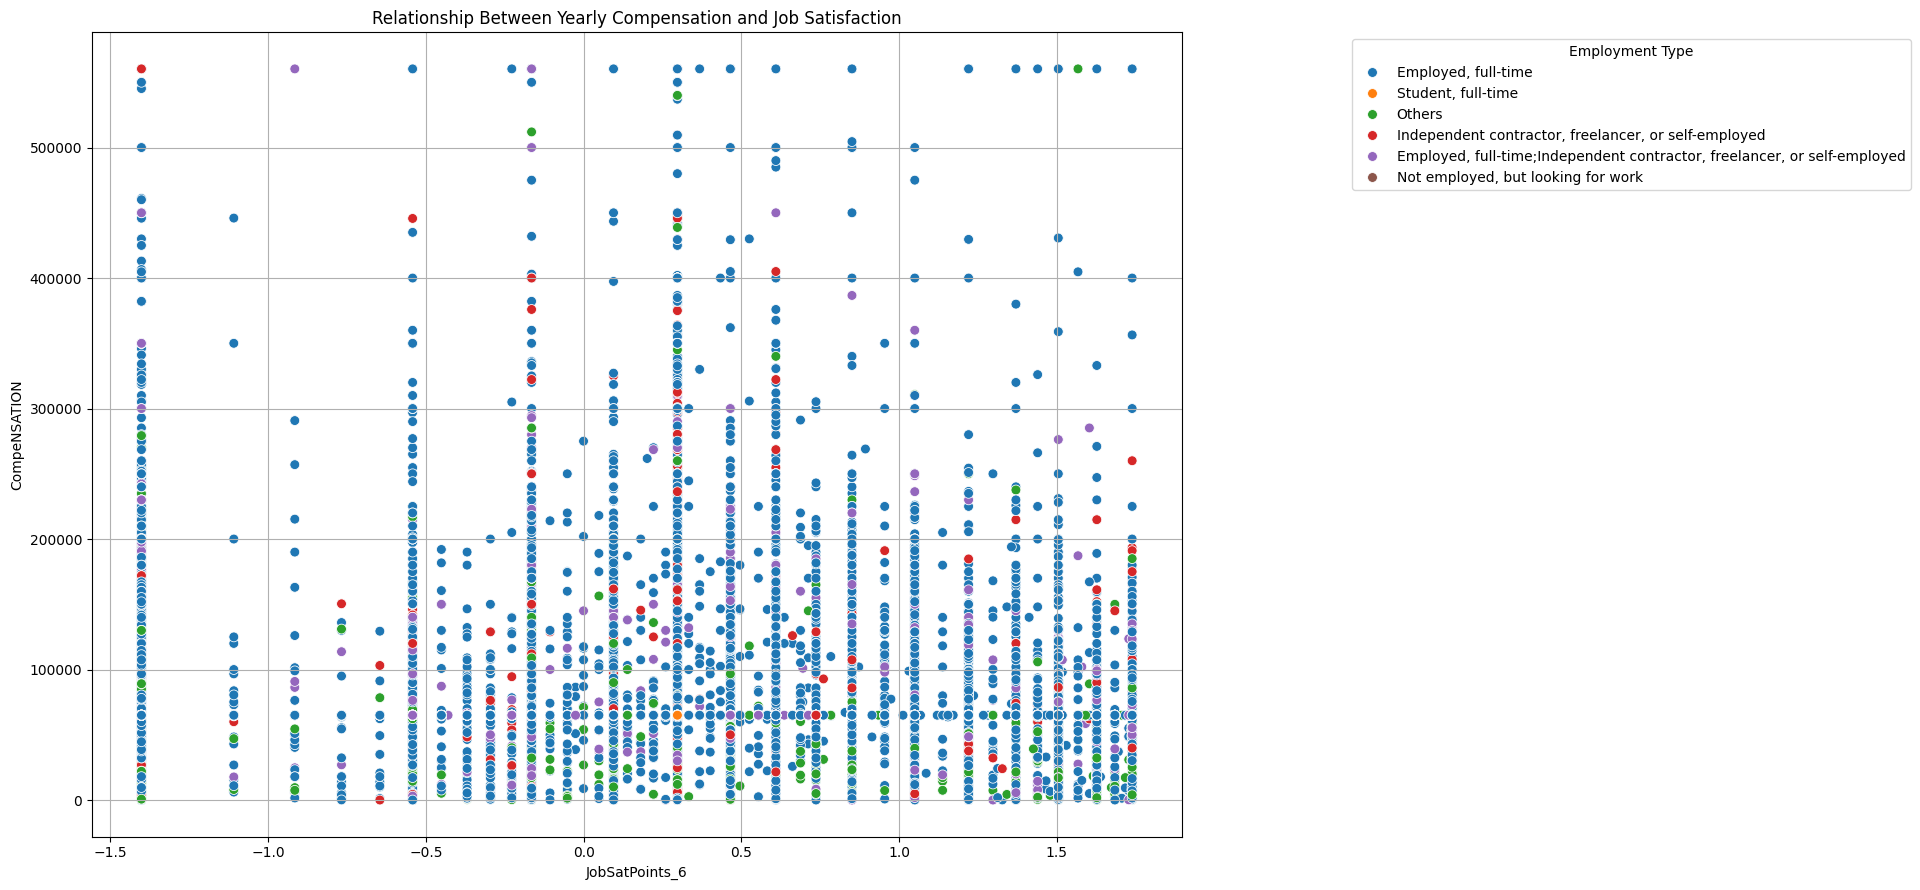

In [203]:
# Step 1: Create a scatter plot with color coding for employment types
plt.figure(figsize=(20, 9))
sns.scatterplot(data=YearlyComp_Jobsat6_Emp, x='JobSatPoints_6', y='ConvertedCompYearly', hue='Employment_Category', s=50)

# Step 2: Customize the plot
plt.title('Relationship Between Yearly Compensation and Job Satisfaction')
plt.xlabel('JobSatPoints_6')
plt.ylabel('CompeNSATION')
plt.grid(True)
plt.legend(title='Employment Type', bbox_to_anchor=(1.15, 1), fontsize='medium')
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


In [225]:
Exp_Age_Country = df.loc[:, ['Age_numerical', 'Age', 'YearsCodePro', 'Country']]

# Define a mapping for YearsCodePro
years_code_pro_mapping = {
    'Less than 1 year': 0,  # Assuming less than 1 year is represented as 0
    'More than 50 years': 51,  # Assuming more than 50 years is represented as 51
    # Add other mappings for string values
}
# Replacing the above categorical values
Exp_Age_Country['YearsCodePro'] = Exp_Age_Country['YearsCodePro'].replace(years_code_pro_mapping)

# Convert the remaining numeric strings to integers
Exp_Age_Country['YearsCodePro'] = pd.to_numeric(Exp_Age_Country['YearsCodePro'], errors='coerce')

# Fill NaN values in the 'YearsCodePro' column with 2
Exp_Age_Country.loc[Exp_Age_Country['YearsCodePro'].isna(), 'YearsCodePro'] = 2
print(Exp_Age_Country.describe(),'\n')
print(Exp_Age_Country.isnull().sum())

       Age_numerical  YearsCodePro
count   65437.000000  65437.000000
mean       33.029853      8.454972
std        11.182094      8.752962
min        17.000000      0.000000
25%        21.000000      2.000000
50%        29.500000      5.000000
75%        39.500000     12.000000
max        70.000000     51.000000 

Age_numerical       0
Age                 0
YearsCodePro        0
Country          6507
dtype: int64


In [226]:
# Drop rows with NaN values and create a new DataFrame
Exp_Age_Country_cleaned = Exp_Age_Country.dropna()

# Optionally, if you want to modify the original DataFrame in place:
# Exp_Age_Country.dropna(inplace=True)

# Print the cleaned DataFrame description and check for any remaining NaN values
print(Exp_Age_Country_cleaned.describe(), '\n')
print(Exp_Age_Country_cleaned.isnull().sum())

       Age_numerical  YearsCodePro
count   58930.000000  58930.000000
mean       33.362617      9.050823
std        11.288411      8.928684
min        17.000000      0.000000
25%        29.500000      2.000000
50%        29.500000      6.000000
75%        39.500000     13.000000
max        70.000000     51.000000 

Age_numerical    0
Age              0
YearsCodePro     0
Country          0
dtype: int64


In [227]:
Exp_Age_Country_cleaned['Country'].value_counts()

Country
United States of America                                11095
Germany                                                  4947
India                                                    4231
United Kingdom of Great Britain and Northern Ireland     3224
Ukraine                                                  2672
                                                        ...  
Micronesia, Federated States of...                          1
Nauru                                                       1
Chad                                                        1
Djibouti                                                    1
Solomon Islands                                             1
Name: count, Length: 185, dtype: int64

In [228]:
country_list=Exp_Age_Country_cleaned['Country'].unique()
print(len(country_list), '\n')
print(country_list)

185 

['United States of America'
 'United Kingdom of Great Britain and Northern Ireland' 'Canada' 'Norway'
 'Uzbekistan' 'Serbia' 'Poland' 'Philippines' 'Bulgaria' 'Switzerland'
 'India' 'Germany' 'Ireland' 'Italy' 'Ukraine' 'Australia' 'Brazil'
 'Japan' 'Austria' 'Iran, Islamic Republic of...' 'France' 'Saudi Arabia'
 'Romania' 'Turkey' 'Nepal' 'Algeria' 'Sweden' 'Netherlands' 'Croatia'
 'Pakistan' 'Czech Republic' 'Republic of North Macedonia' 'Finland'
 'Slovakia' 'Russian Federation' 'Greece' 'Israel' 'Belgium' 'Mexico'
 'United Republic of Tanzania' 'Hungary' 'Argentina' 'Portugal'
 'Sri Lanka' 'Latvia' 'China' 'Singapore' 'Lebanon' 'Spain' 'South Africa'
 'Lithuania' 'Viet Nam' 'Dominican Republic' 'Indonesia' 'Kosovo'
 'Morocco' 'Taiwan' 'Georgia' 'San Marino' 'Tunisia' 'Bangladesh'
 'Nigeria' 'Liechtenstein' 'Denmark' 'Ecuador' 'Malaysia' 'Albania'
 'Azerbaijan' 'Chile' 'Ghana' 'Peru' 'Bolivia' 'Egypt' 'Luxembourg'
 'Montenegro' 'Cyprus' 'Paraguay' 'Kazakhstan' 'Slovenia' 'Jor

In [231]:
# Turn the Country into str first, then strip two ends then in the middle with regex
Exp_Age_Country_cleaned['Country'] = Exp_Age_Country_cleaned['Country'].astype(str)
Exp_Age_Country_cleaned['Country'] = Exp_Age_Country_cleaned['Country'].str.strip()
Exp_Age_Country_cleaned['Country'] = Exp_Age_Country_cleaned['Country'].str.replace('Republic Of Korea', '', regex=False)
Exp_Age_Country_cleaned['Country'] = Exp_Age_Country_cleaned['Country'].str.replace("Democratic People'S Republic Of Korea", '', regex=False)
Exp_Age_Country_cleaned['Country'] = Exp_Age_Country_cleaned['Country'].str.replace("Democratic Republic Of The Congo", '', regex=False)
Exp_Age_Country_cleaned['Country'] = Exp_Age_Country_cleaned['Country'].str.replace("Micronesia, Federated States", '', regex=False)
Exp_Age_Country_cleaned['Country'] = Exp_Age_Country_cleaned['Country'].str.replace("Democratic People'S ", '', regex=False)
Exp_Age_Country_cleaned['Country'] = Exp_Age_Country_cleaned['Country'].str.replace(',', '', regex=False)
Exp_Age_Country_cleaned['Country'] = Exp_Age_Country_cleaned['Country'].str.title()
Exp_Age_Country_cleaned['Country'] = Exp_Age_Country_cleaned['Country'].replace('United Kingdom Of Great Britain And Northern Ireland', 'UK and IRE')
Exp_Age_Country_cleaned['Country'] = Exp_Age_Country_cleaned['Country'].replace('United States Of America', 'USA')
Exp_Age_Country_cleaned['Country'] = Exp_Age_Country_cleaned['Country'].replace('Iran Islamic Republic Of...', 'Iran')
Exp_Age_Country_cleaned['Country'] = Exp_Age_Country_cleaned['Country'].replace('United Republic Of Tanzania', 'Tanzania')
Exp_Age_Country_cleaned['Country'] = Exp_Age_Country_cleaned['Country'].replace("Lao People'S Democratic Republic", 'Lao')
Exp_Age_Country_cleaned['Country'] = Exp_Age_Country_cleaned['Country'].replace('Central African Republic', 'Central Africa')
Exp_Age_Country_cleaned['Country'] = Exp_Age_Country_cleaned['Country'].replace('Congo Republic Of The...', 'Congo')
Exp_Age_Country_cleaned['Country'] = Exp_Age_Country_cleaned['Country'].replace('Micronesia, Federated States Of', 'Micronesia')
Exp_Age_Country_cleaned['Country'] = Exp_Age_Country_cleaned['Country'].replace('Libyan Arab Jamahiriya', 'Libya')
Exp_Age_Country_cleaned['Country'] = Exp_Age_Country_cleaned['Country'].replace('Brunei Darussalam', 'Brunei')
Exp_Age_Country_cleaned['Country'] = Exp_Age_Country_cleaned['Country'].replace('Russian Federation', 'Russia')
Exp_Age_Country_cleaned['Country'] = Exp_Age_Country_cleaned['Country'].replace('Venezuela Bolivarian Republic Of...', 'Venezuela')

/tmp/ipykernel_301/2892484141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Exp_Age_Country_cleaned['Country'] = Exp_Age_Country_cleaned['Country'].astype(str)
/tmp/ipykernel_301/2892484141.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Exp_Age_Country_cleaned['Country'] = Exp_Age_Country_cleaned['Country'].str.strip()
/tmp/ipykernel_301/2892484141.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [232]:
Exp_Age_Country.head()

Age_numerical                 Age  YearsCodePro  \
0           17.0  Under 18 years old           2.0   
1           39.5     35-44 years old          17.0   
2           49.5     45-54 years old          27.0   
3           21.0     18-24 years old           2.0   
4           21.0     18-24 years old           2.0   

                                             Country  
0                           United States of America  
1  United Kingdom of Great Britain and Northern I...  
2  United Kingdom of Great Britain and Northern I...  
3                                             Canada  
4                                             Norway

/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


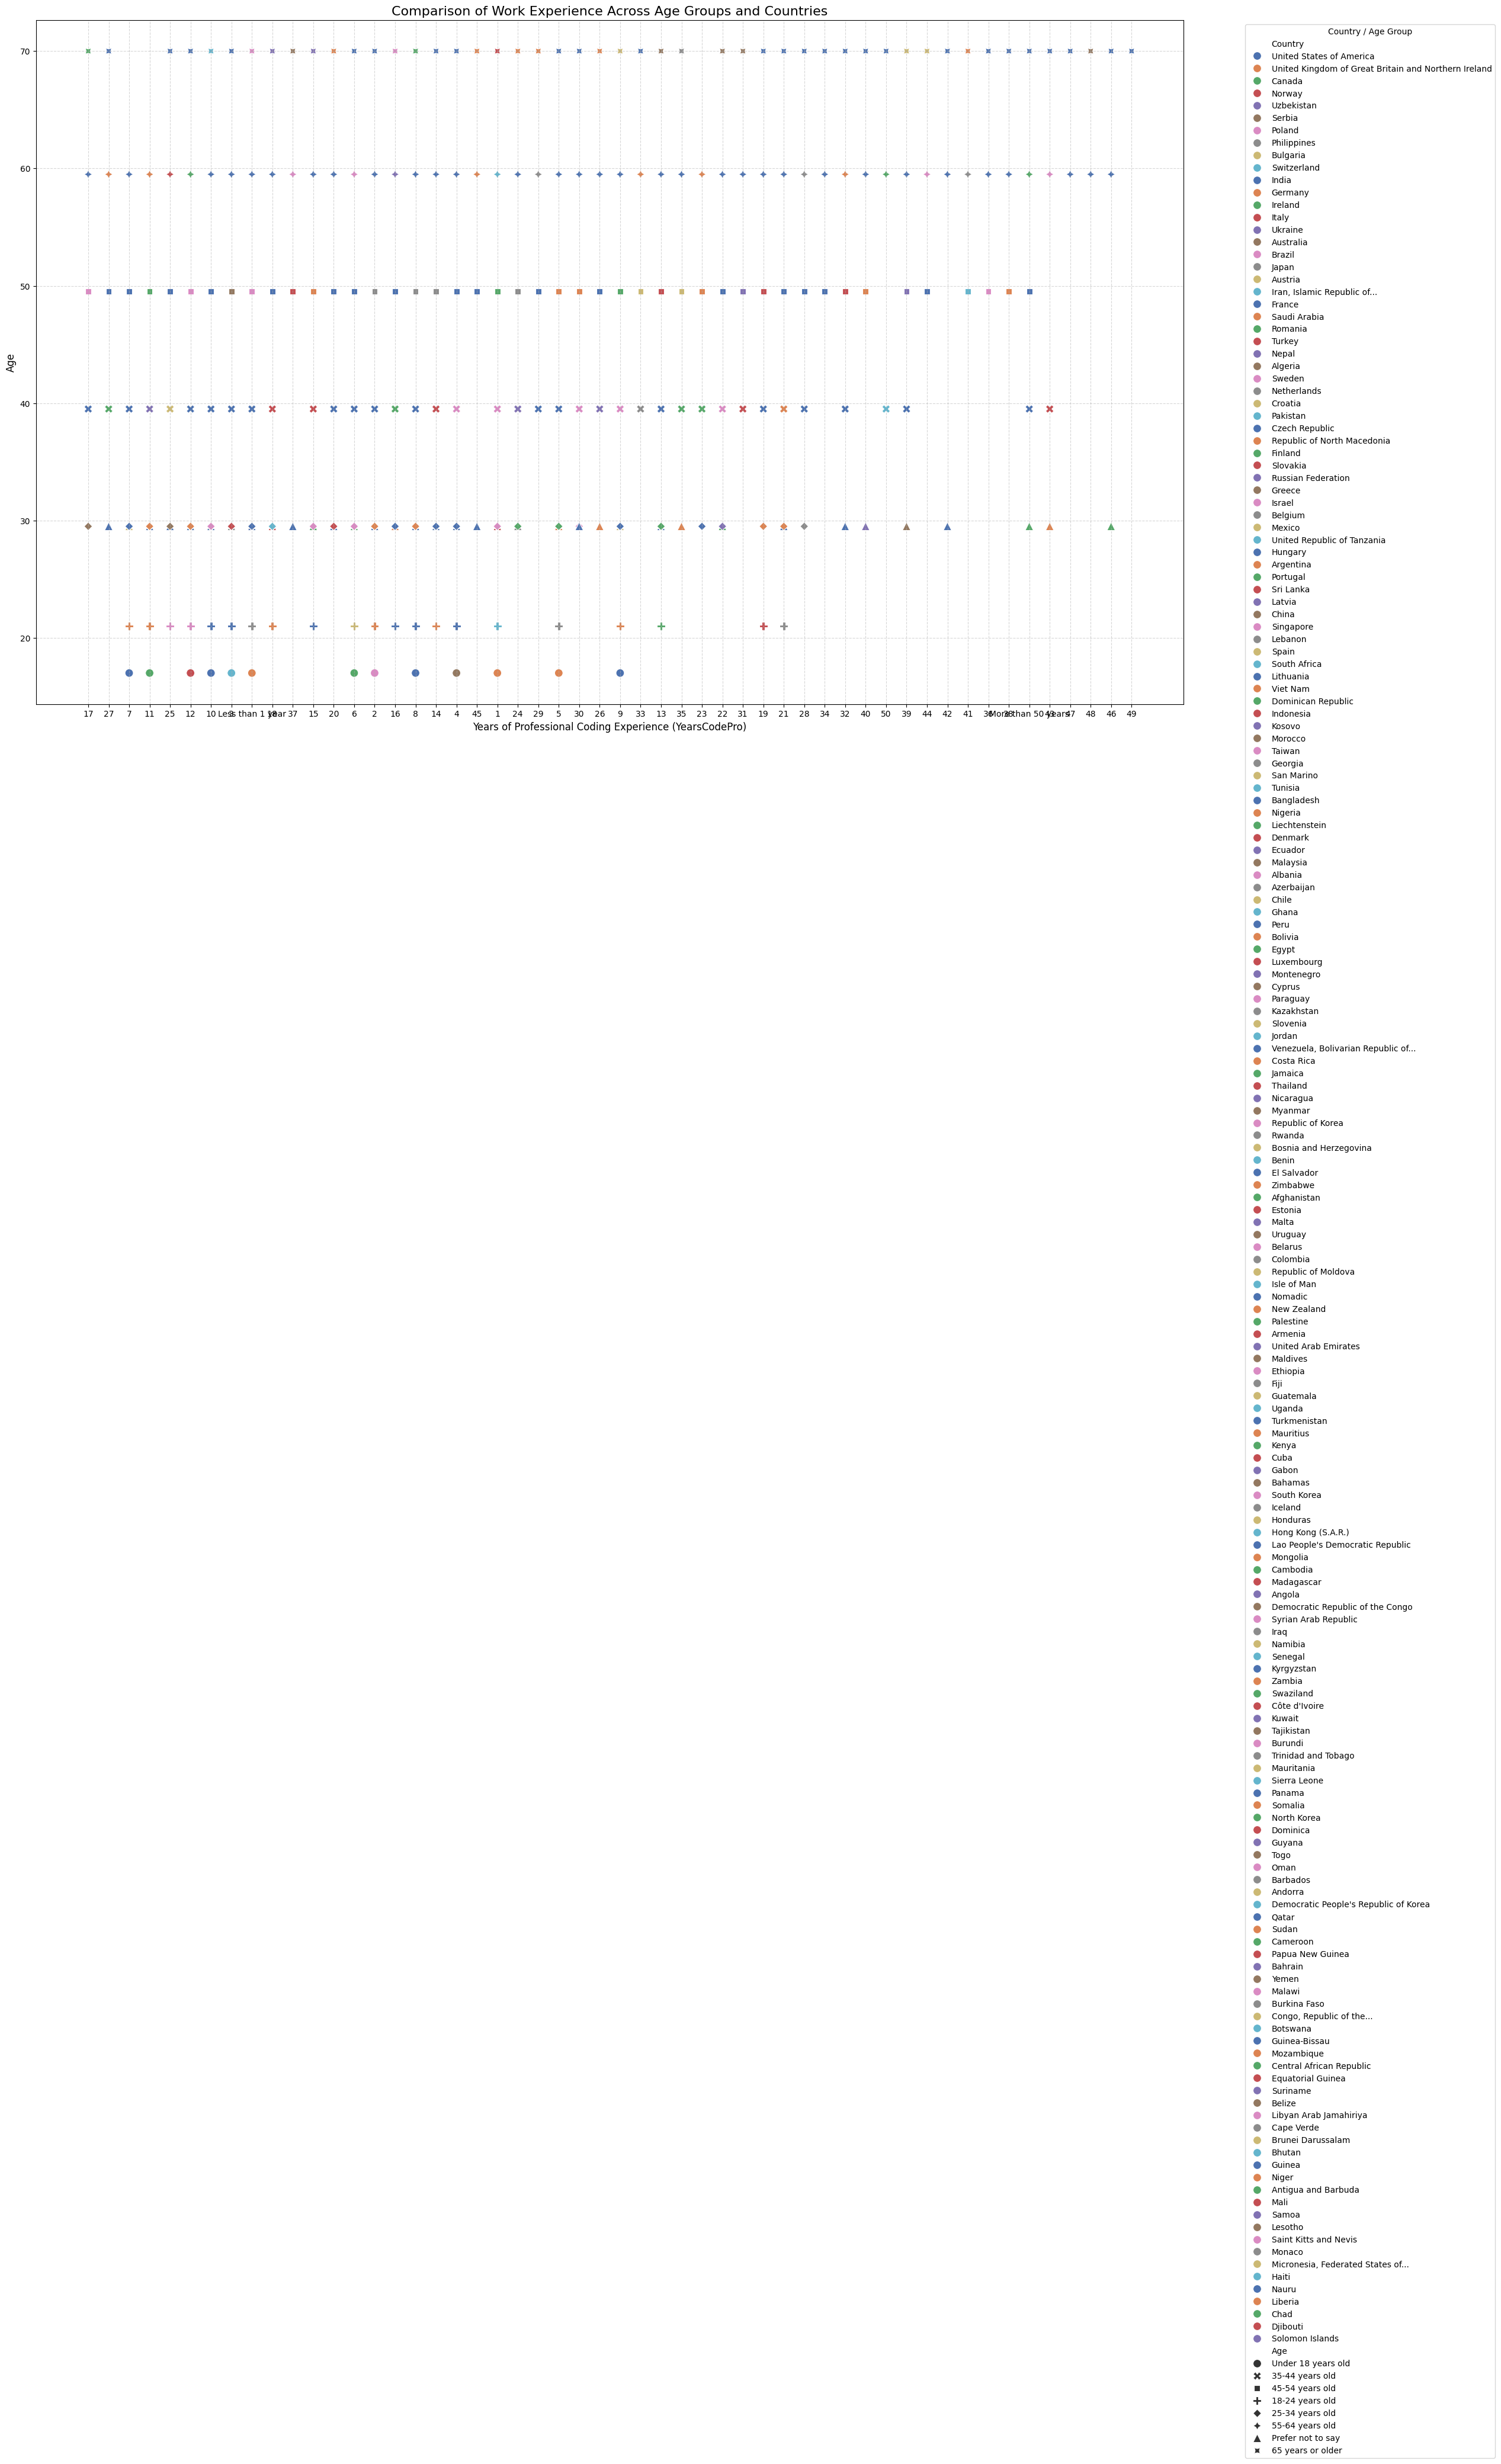

In [235]:
# Step 1: Create a scatter plot with color coding for countries and markers for age groups
plt.figure(figsize=(25, 15))
sns.scatterplot(data=df, x='YearsCodePro', y='Age_numerical', 
                hue='Country', style='Age', s=100, palette='deep')

# Step 2: Customize the plot
plt.title('Comparison of Work Experience Across Age Groups and Countries', fontsize=16)
plt.xlabel('Years of Professional Coding Experience (YearsCodePro)', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Country / Age Group', bbox_to_anchor=(1.05, 1), fontsize='medium')
plt.show()

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
